## Veliki kih

Neka visokomogočna in precej velika bitja, so zbrala 65536 zvezd najrazličnejših svetlosti. Razporedila so jih na dvodimenzionalno mrežo velikosti 256x256. Če so stvaritev pogledala od daleč, je bila videti kot črno-bela slika. (No, v resnici črno-oranžno-rumeno-bela, saj gre za zvezde). Zvezde so torej predstavljale piksle neke oranženkaste slike.

Slika je bila imenitna in znana in imela celo ime. Rekli so ji ... bogvekako, tudi ime se je izgubilo.

Dolga leta je bila razstavljena. Potem je eden od ogledovalcev kihnil. Močno kihnil.

Zvezde so se razletele vsaka na svojo stran. Ene počasneje, ene hitreje; ene levo, ene desno, ene gor, ene dol; večina, pač, nekam postrani.

Okrog zvezd so se sčasoma naredili planeti. Na planetih je zrasel najprej en sam plevel, kasneje pa tudi solata in žirafe. In neka manj mogočna in manj velika bitja, ki pa so sčasoma odkrila teleskope in spektre in tako naprej. V datoteko [meritve.txt](meritve.txt) so zbrala podatke o meritvah. Vsaka vrstica datoteke predstavlja eno zvedo: prvi stolpec pove njeno svetlost, drugi in tretji njeni koordinati, četrti in peti pa njeno hitrost v smeri x in smeri y (torej: za koliko se spremenijo koordinate zvezde v enem stoletju). Ker so ona, prva bitja, bila in tudi ostala zelo diskretna, so vsa števila cela.

Kako je bilo ime sliki?

Namig: za začetek bo treba ugotoviti, kaj je bilo na njej ... pred velikim kihom.

### Tehnična pomoč

Izziva se lahko seveda lotiš v poljubnem jeziku. Ker se na predavanjih pogovarjamo o numpyju in Pythonu, pa je tule pomoč za numpy in Python.

Podatke najlažje preberemo z

In [5]:
import numpy as np

np.loadtxt("meritve.txt", dtype=np.int64)

array([[    129,  -61647,  -36969,      -5,      -3],
       [     74,   24912, -111090,       2,      -9],
       [    147,  -98733,   98855,      -8,       8],
       ...,
       [     78,   74129,  -36870,       6,      -3],
       [     58,   12523,  -49280,       1,      -4],
       [    145,   49468,  -61501,       4,      -5]], dtype=int64)

Kako to premetavati naprej, odkrij sam(a).

Če želim v jupytru pokazati sliko dimenzij (30, 50), ki ima neko bolj temno zvezdo na (5, 7) in neko svetlejšo na (25, 33), nam je storiti tole:

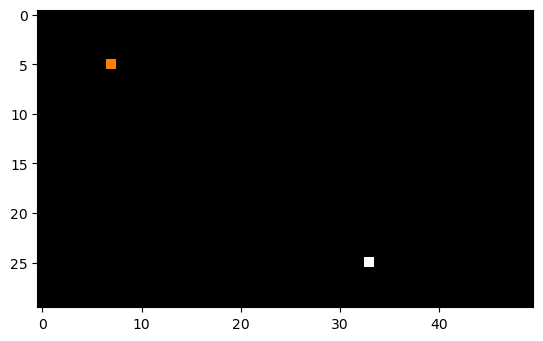

In [6]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

slika = np.zeros((30, 50), dtype=np.uint8)
slika[5, 7] = 64
slika[25, 33] = 128

plt.imshow(slika, cmap="afmhot")

Z `dtype=np.uint8` v klicu `np.zeros` povemo, da matrika vsebuje cela števila (osembitne nepredznačene `int`-e). V tem primeru `plt.imshow` pričakuje vrednosti med 0 in 255, kar ravno ustreza svetlostim zvezd. (Kakšno naključje.)

Argument `cmap="afmhot"` v klicu `plt.imshow` določi barvno paleto. Če bi napisali `cmap="gray"`, bi bila slika črno-bela. Ker gre za sliko iz zvezd, bo ustrezna paleta `"afmhot"`.

Namig: ni težko, samo simulacijo je potrebno pognati nazaj. Zadnja dva stolpca povesta, za koliko se drugi in tretji stolpci spremenita v vsakem stoletju. Odkriti morate, za koliko stoletij **nazaj** je potrebno iti, da se bodo vse številke v drugem stolpcu razlikovale za največ

Zacetek naloge:

AxesImage(80,52.8;496x369.6)


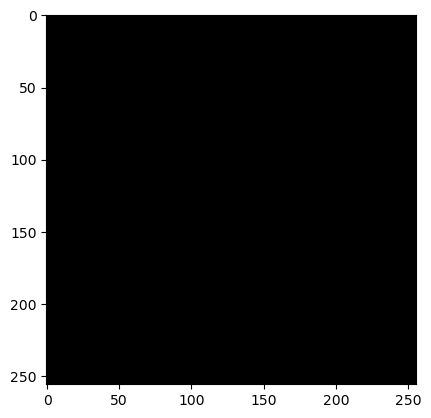

In [7]:
import numpy as np
import matplotlib.pyplot as plt


lokacije = np.loadtxt("meritve.txt", dtype=np.int64)

slika = np.zeros((256, 256), dtype=np.uint8)

tabela = plt.imshow(slika, cmap="afmhot")
print(tabela)


In [8]:
print(lokacije)

[[    129  -61647  -36969      -5      -3]
 [     74   24912 -111090       2      -9]
 [    147  -98733   98855      -8       8]
 ...
 [     78   74129  -36870       6      -3]
 [     58   12523  -49280       1      -4]
 [    145   49468  -61501       4      -5]]


In [9]:
stoletja = 0
razlika = 0
vrednostixou = 0 
#Dobimo vrednost 
for svetlost, x, y, hitrost_x, hitrost_y in lokacije:
    vrednostixou = x + vrednostixou
print(vrednostixou)

for svetlost, x, y, hitrost_x, hitrost_y in lokacije:
    print(svetlost)


-401683335
129
74
147
120
126
201
155
149
98
84
215
151
157
205
141
106
167
225
141
193
94
203
38
187
122
155
68
163
155
46
189
86
52
153
141
78
124
143
44
68
177
56
191
122
96
133
135
141
64
46
173
42
129
122
40
143
131
56
179
98
145
106
165
129
179
104
78
129
179
149
120
131
50
108
100
70
44
112
120
94
141
195
145
135
102
90
36
46
131
137
78
171
78
118
118
94
181
62
173
143
167
70
96
149
159
195
80
66
189
84
72
108
165
157
151
131
52
149
50
209
58
169
173
58
129
143
50
133
110
149
96
120
118
48
124
195
48
40
173
122
124
118
102
88
141
159
76
114
131
50
100
187
137
197
104
213
122
155
54
106
155
191
183
153
88
116
207
211
131
169
165
70
76
145
116
102
50
102
191
161
207
189
131
159
197
157
50
44
52
135
207
74
50
223
126
96
169
120
167
100
155
94
104
126
104
167
129
201
112
191
84
133
44
209
159
114
147
159
143
167
191
147
62
207
179
135
126
191
205
155
169
30
143
110
141
129
122
201
36
145
44
197
145
159
108
153
213
102
151
169
116
82
86
80
126
141
155
50
167
48
137
88
159
177
201
60
